In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/datasets/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [28]:
X = df.drop(columns=['Rings'])
y = df['Rings']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3341, 9), (3341, 28), (836, 9), (836, 28))

In [31]:
### 3. 딥러닝 회귀 수행 ###
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

# 신경망 모델 구성
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # 회귀를 위한 출력 레이어

C:\Users\yujin\anaconda32\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0355 - val_mse: 0.0355
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 977us

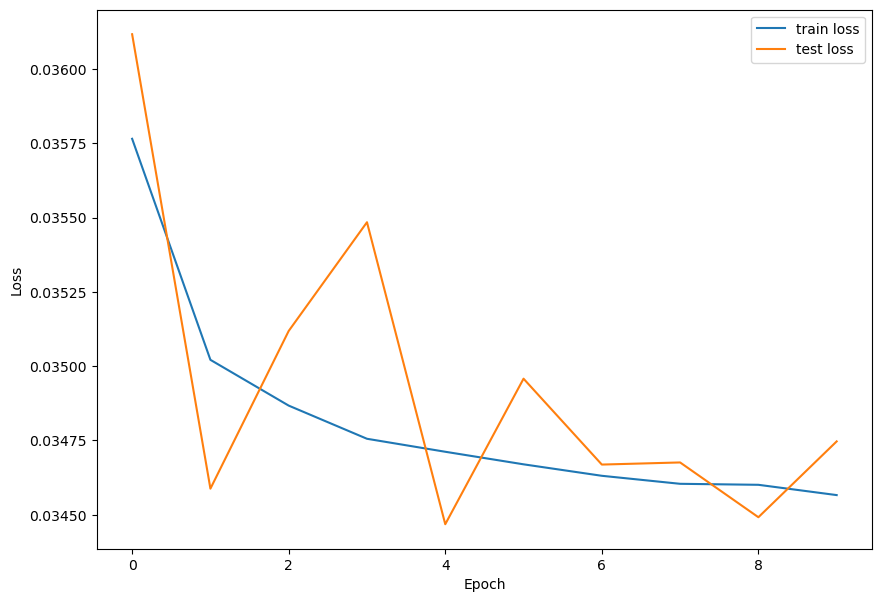

In [34]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 0.0347 - mse: 0.0347


[0.03474695608019829, 0.03474695608019829]